# Audi Europe Cars Experience Analysis and Price Prediction using Machine Learning Algorithms !

## _Audi European sales have risen steadily every year from 2009 to 2016. As a result, the brand has added almost 1,5 percentage point of  market share during the period_

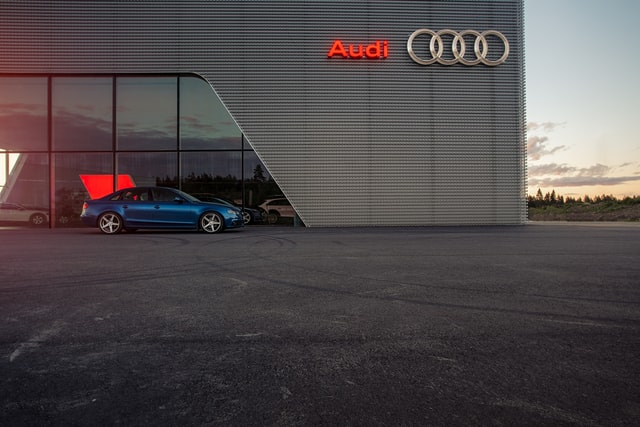

## _This is a result of a growing line-up, filling all niches and creating new ones in the premium segment of the market. For example, the subcompact Audi A1 was introduced in 2009 and added almost 100.000 annual car sales to Audi’s total from 2011 onwards._

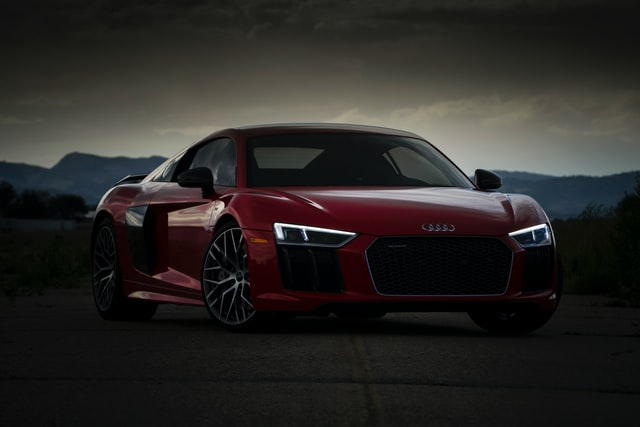

## _Then in 2010, Audi introduced the A7, a four door luxury coupe to compete with the Mercedes-Benz CLS. Both models showed similar sales in 2011 and 2012, but since 2013 the A7 has fallen behind the CLS in sales as Mercedes launched the Shooting Brake version. The introduction of the sporty top-of-the-line RS7 has been unable to reverse this slide._

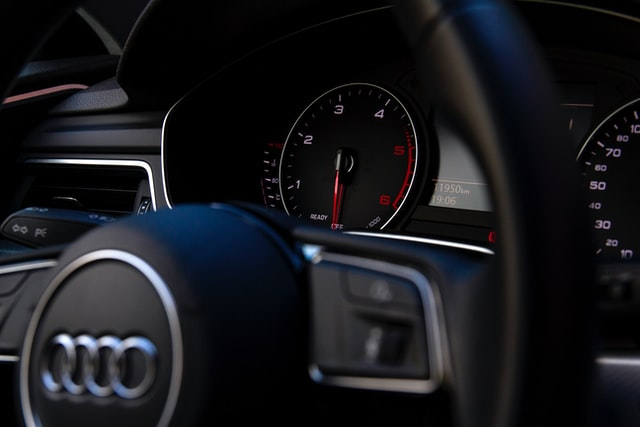

## _In full-year 2020, global Audi sales were down 8.3% to 1,692,773 cars delivered worldwide. Despite weaker sales, Audi gained market share in most major markets. In China, by far the most important single-country market for Audi, sales increased by 5.4% to a record 727,358. The fourth quarter of 2020 was Audi’s best quarter ever with over half a million sales worldwide. Audi forecasts global sales growth in 2021._

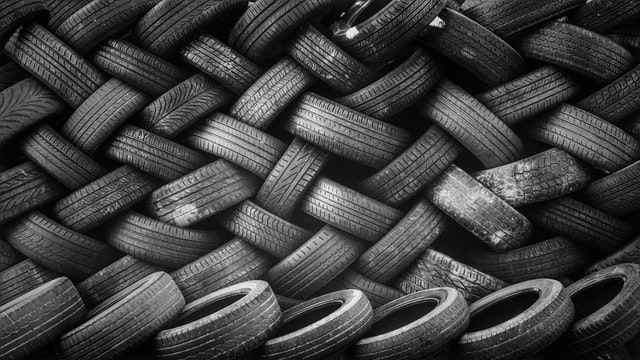

---
--- 
# _Importing Libraries_

In [2]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# _Reading the Dataset_

In [5]:
df = pd.read_csv('audi car dataset.csv')

In [6]:
df.head()

,model,year,transmission,distance,fuelType,tax,mpg,engineSize,europrice
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300


# _Checking for null values:_

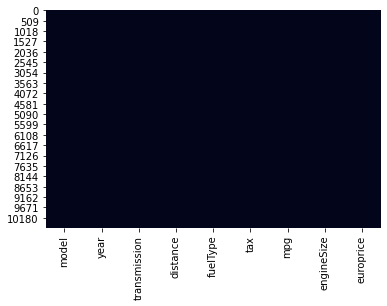

In [7]:
sns.heatmap(df.isnull(), cbar=False)

##### As it seems, no Null values to take care of-
---

# _Exploratory data analysis and visualization:_

In [9]:
df.shape

(10668, 9)

In [19]:
df.describe()

,year,distance,tax,mpg,engineSize,europrice
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,24827.244001,126.011436,50.770022,1.930709,22896.685039
std,2.167494,23505.257205,67.170294,12.949782,0.602957,11714.841888
min,1997.000000,1.000000,0.000000,18.900000,0.000000,1490.000000
25%,2016.000000,5968.750000,125.000000,40.900000,1.500000,15130.750000
50%,2017.000000,19000.000000,145.000000,49.600000,2.000000,20200.000000
75%,2019.000000,36464.500000,145.000000,58.900000,2.000000,27990.000000
max,2020.000000,323000.000000,580.000000,188.300000,6.300000,145000.000000


## _Using Correlation to plot a Heatmap_

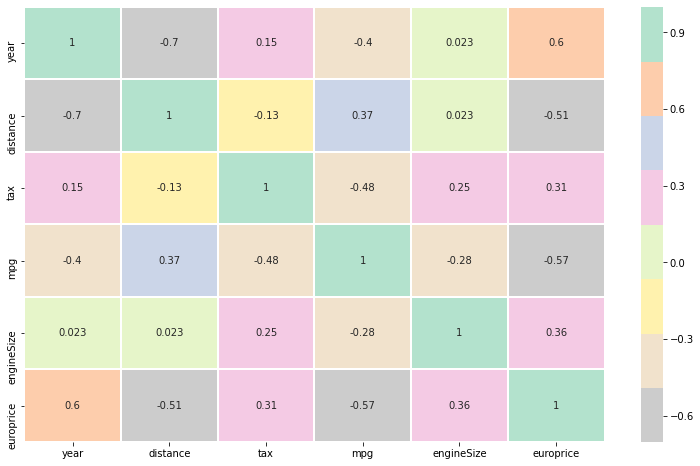

In [20]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="Pastel2_r", linewidths=.9)

## _Visualizing_
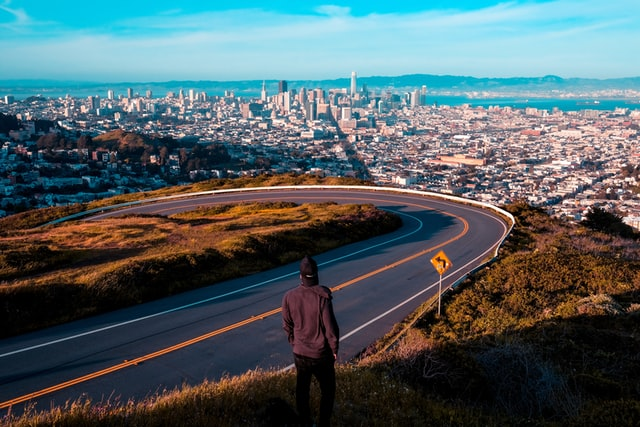

Text(0.5, 1.0, 'All Models up for sale:')

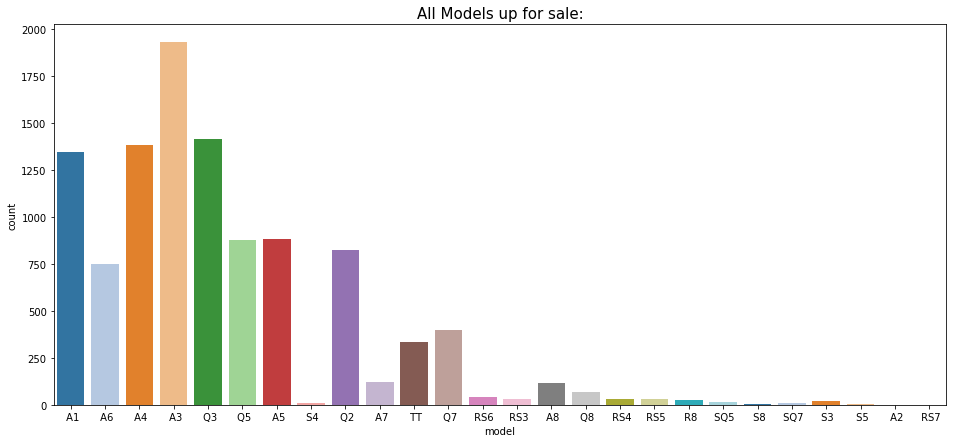

In [13]:
plt.figure(figsize=(16,7))
g = sns.countplot(x='model',data=df, palette='tab20')
plt.title("All Models up for sale:", size =15)

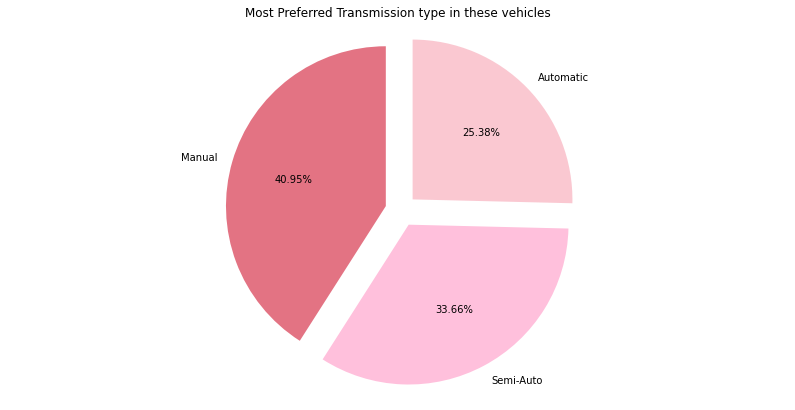

In [42]:
plt.figure(figsize=(14, 7))
labels=['Manual','Semi-Auto','Automatic']
plt.pie(df['transmission'].value_counts(),labels=labels,explode=[0.1,0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0DC', '#E354'], startangle=90)
plt.title('Most Preferred Transmission type in these vehicles')
plt.axis('equal')
plt.show()

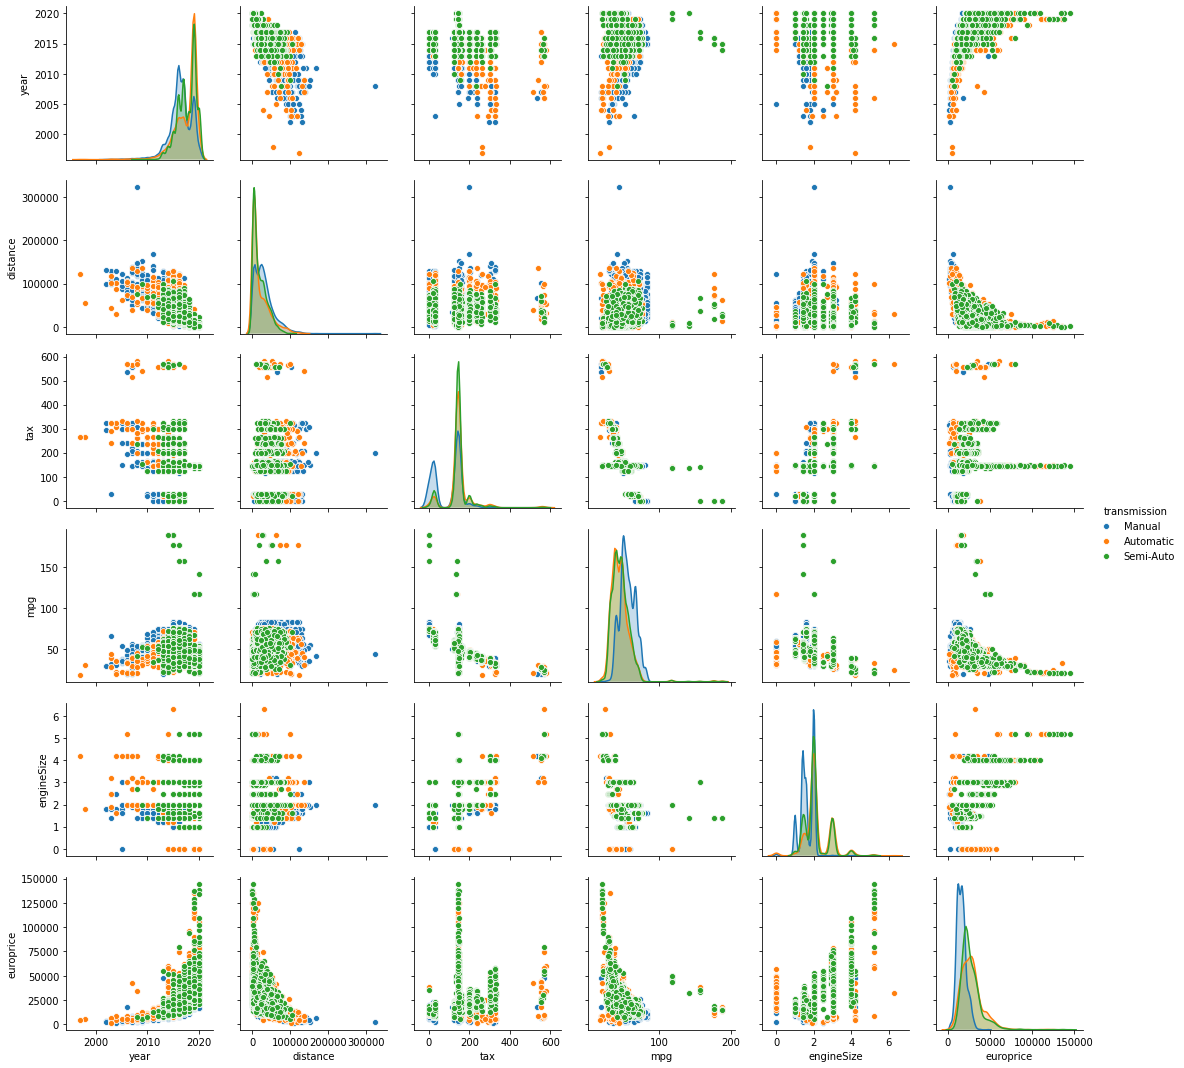

In [18]:
sns.pairplot(data=df, hue='transmission')

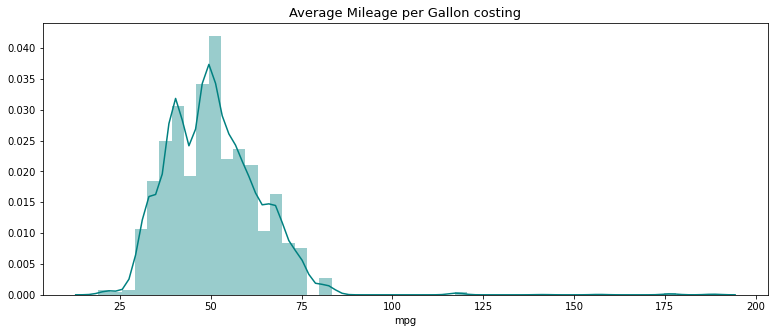

In [45]:
plt.figure(figsize=(13,5))
sns.distplot(df['mpg'], color = 'teal')
plt.title('Average Mileage per Gallon costing', size = 13)
plt.show()

Text(0.5, 1.0, 'Manufactured year of cars wrt fuel type they come in :')

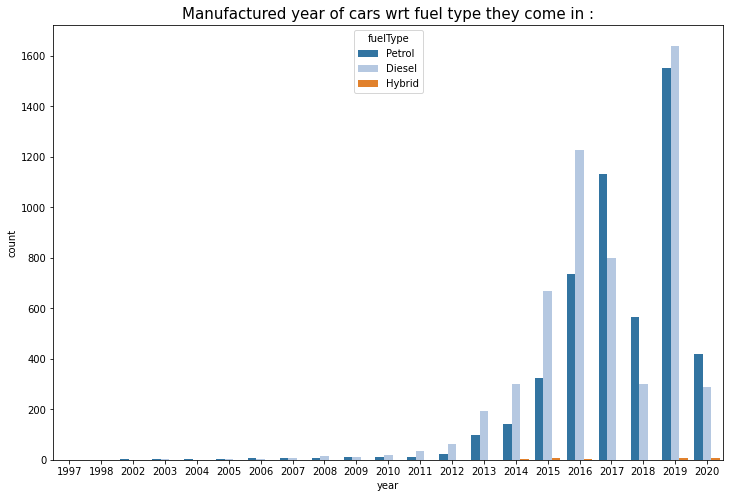

In [15]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='year',data=df,hue='fuelType', palette='tab20')
plt.title("Manufactured year of cars wrt fuel type they come in :", size =15)

Text(0.5, 1.0, 'Avaliable Engine size for the given cars:')

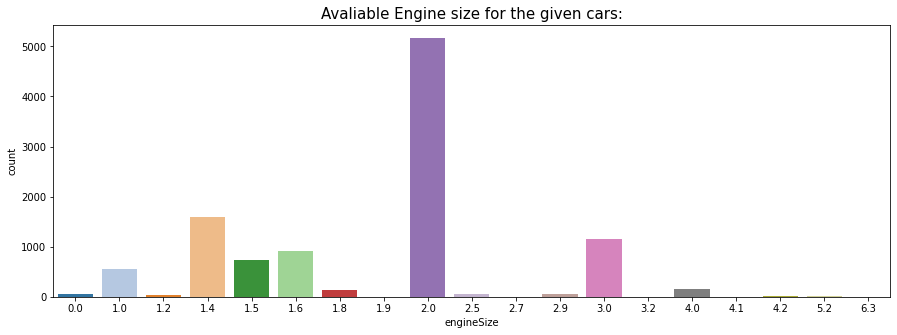

In [33]:
plt.figure(figsize=(15,5))
g = sns.countplot(x='engineSize',data=df, palette='tab20')
plt.title("Avaliable Engine size for the given cars:", size =15)

Text(0.5, 1.0, 'Analyzing FuelType of these vehicles through time efficiency')

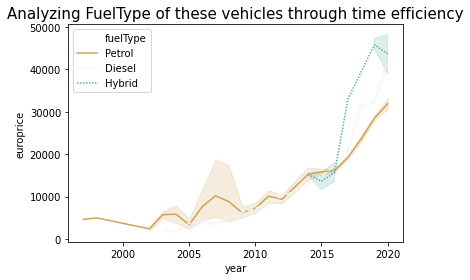

In [22]:
palette = sns.color_palette("BrBG", 3)
sns.lineplot(data=df, x="year", y="europrice", hue='fuelType', style="fuelType", palette=palette)
plt.title('Analyzing FuelType of these vehicles through time efficiency', size = 15)

Text(0.5, 1.0, 'Manufactured cars transmission and fuel type analysis :')

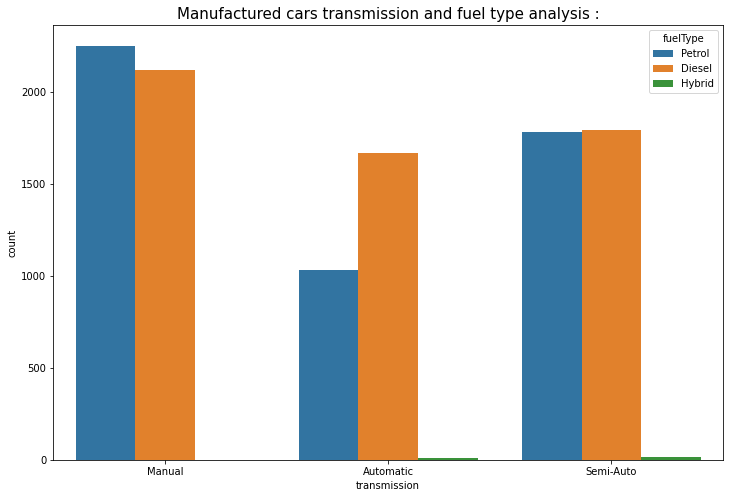

In [36]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='transmission',data=df,hue='fuelType', palette='tab10')
plt.title("Manufactured cars transmission and fuel type analysis :", size =15)

Text(0.5, 1.0, 'Manufactured cars transmission of all models :')

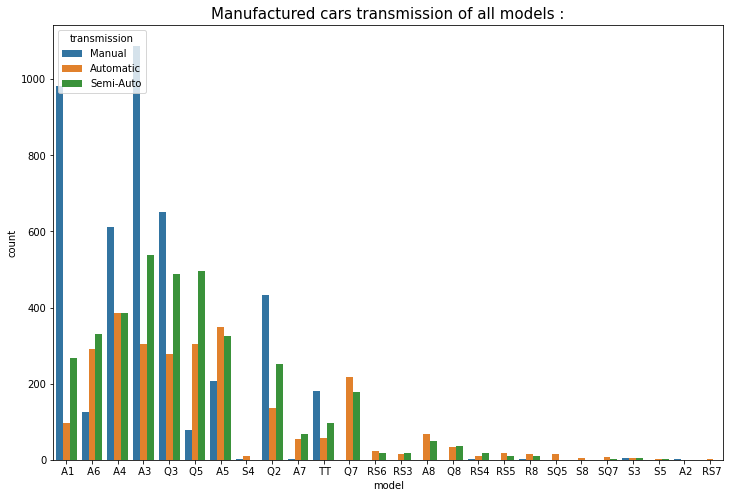

In [40]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='model',data=df,hue='transmission', palette='tab10')
plt.title("Manufactured cars transmission of all models :", size =15)

# _Data Preprocessing_

In [41]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [42]:
ordinal_encoder = OrdinalEncoder()
df['model'] = ordinal_encoder.fit_transform(df[['model']])

In [43]:
OH_encoder = OneHotEncoder(sparse=False)
oh_cols = pd.DataFrame(OH_encoder.fit_transform(df[['transmission', 'fuelType']]))
oh_cols.columns = ['trans_0', 'trans_1', 'trans_2', 'fuel_0', 'fuel_1', 'fuel_2']

In [51]:
# droppping unnecessary columns

df = df.drop(['transmission', 'fuelType'], axis=1)
df = pd.concat([df, oh_cols], axis=1)

---
---
# _Making the model_

In [47]:
df.head()

,model,year,distance,tax,mpg,engineSize,europrice,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2
0,0.0,2017,15735,150,55.4,1.4,12500,0.0,1.0,0.0,0.0,0.0,1.0
1,5.0,2016,36203,20,64.2,2.0,16500,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2016,29946,30,55.4,1.4,11000,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,2017,25952,145,67.3,2.0,16800,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,2019,1998,145,49.6,1.0,17300,0.0,1.0,0.0,0.0,0.0,1.0


# _Independent and dependent features_

In [53]:
X = df.drop(['europrice'], axis=1)

In [54]:
y = df['europrice']

# _Train-Test split_

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

---
## _Now, training the model,_

---
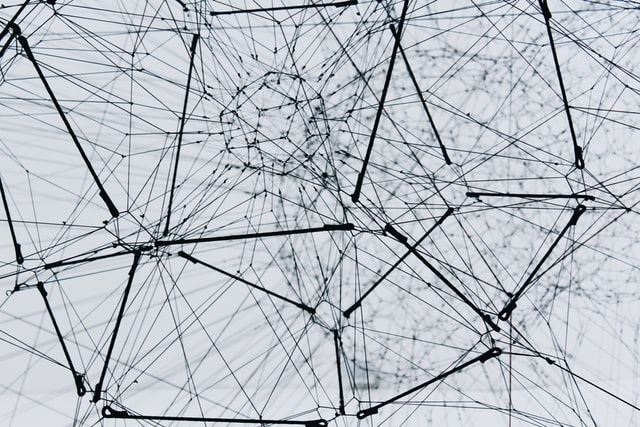
---

# _Using Linear Regression:_

In [58]:
from sklearn import linear_model

In [59]:
linreg =linear_model.LinearRegression()
linreg_model = linreg.fit(X_train,y_train)

In [60]:
linreg_pred =linreg_model.predict(X_test)

### _Plotting the curve of Linear Regression prediction_

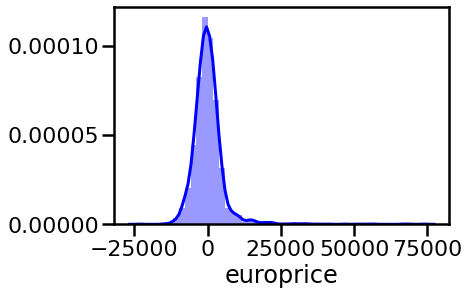

In [62]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-linreg_pred, color ="blue")

In [63]:
from sklearn import metrics

In [64]:
print('Mean Absolute Error of Linear Regresson:', metrics.mean_absolute_error(y_test, linreg_pred))

Mean Absolute Error of Linear Regresson: 3309.9765468745045


In [66]:
print('Root Mean Squared Error of Linear Regresson:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

Root Mean Squared Error of Linear Regresson: 5464.894618709897


### _Plotting the best fit line for Linear Regression model_

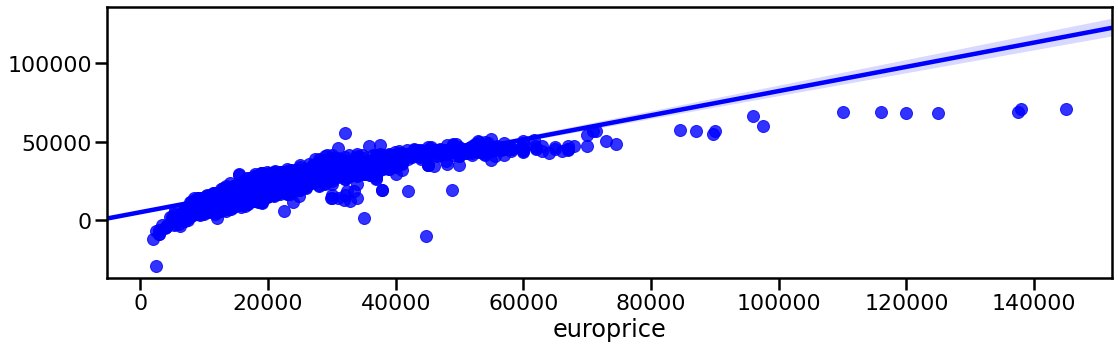

In [67]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,linreg_pred, color ='blue')

---
---
---
# _Using Random Forest Regressor:_
---

In [69]:
 from sklearn.ensemble import RandomForestRegressor

In [70]:
rf = RandomForestRegressor(n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [71]:
rf_pred =rf_model.predict(X_test)

### _Plotting the curve of Random Forest Regressor prediction_

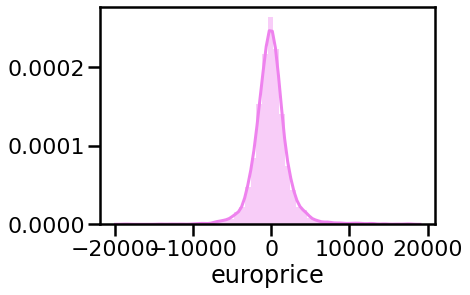

In [72]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-rf_pred, color ="violet")

### _Plotting the best fit line of Random Forest Regression prediction_

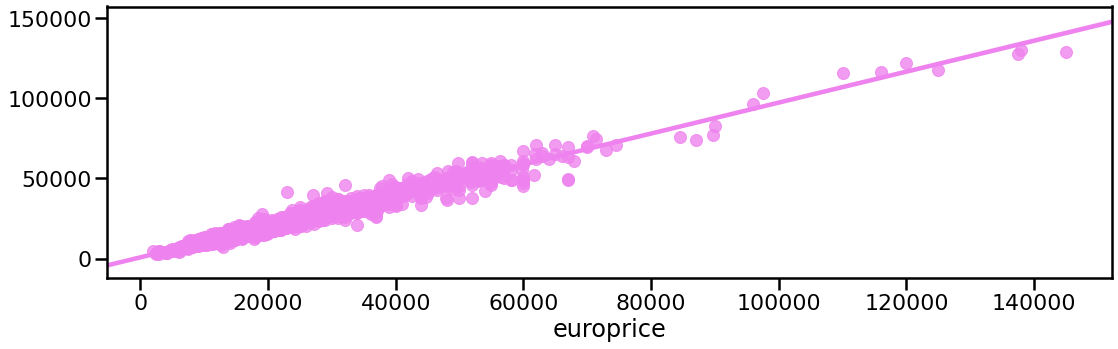

In [73]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,rf_pred, color ='violet')

In [74]:
print('Mean Absolute Error of Random Forest Regressor:', metrics.mean_absolute_error(y_test, rf_pred))

Mean Absolute Error of Random Forest Regressor: 1524.948549075248


In [75]:
print('Root Mean Squared Errorof Random Forest Regressor :', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

Root Mean Squared Errorof Random Forest Regressor : 2283.3796327174828


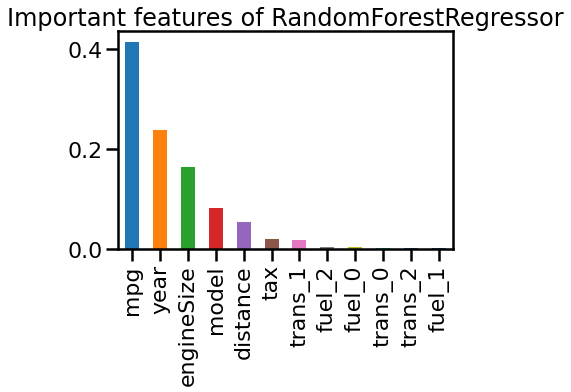

In [76]:
rf_features = pd.Series(rf_model.feature_importances_, X.columns).sort_values(ascending=False)
rf_features.plot(kind='bar', title='Important features of RandomForestRegressor')

---
---

# _Using Extra Trees Regressor:_
---

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

In [78]:
etr=ExtraTreesRegressor(n_estimators = 120)

In [79]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [80]:
etr_pred=etr.predict(X_test)

### _Plotting the curve of Extra Tree Regressor Model Prediction_

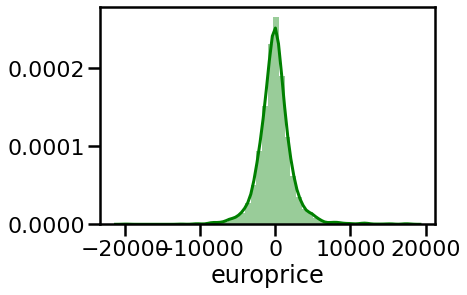

In [81]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-etr_pred, color ="green")

### _and the best fit line_

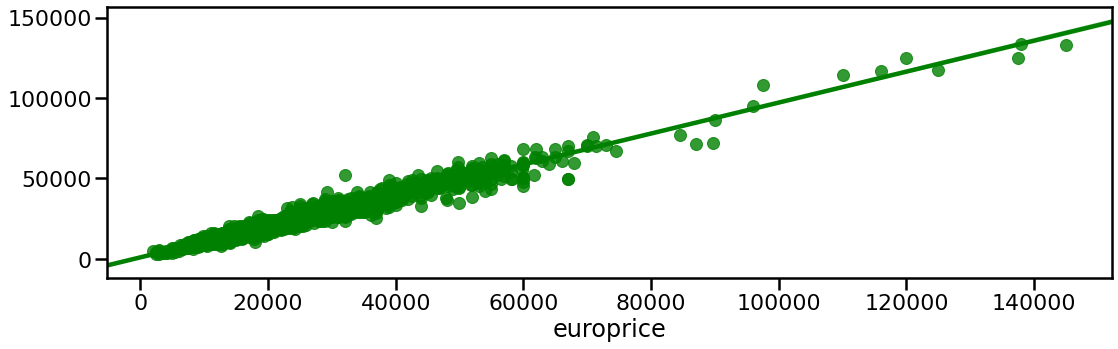

In [82]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,etr_pred, color ='green')

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, etr_pred))

Mean Absolute Error: 1563.2848940228666


In [84]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, etr_pred)))

Root Mean Squared Error: 2346.909421751151


---
---

# _Using Decision Tree Regressor:_
---

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
dtr = DecisionTreeRegressor()

In [88]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [89]:
dtr_pred=dtr.predict(X_test)

### _Plotting the curve of Decision Tree Regressor Model Prediction_

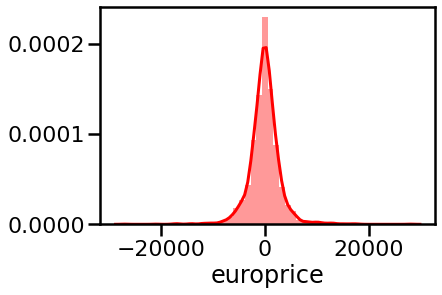

In [90]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-dtr_pred, color ="red")

### _And the best fit line_

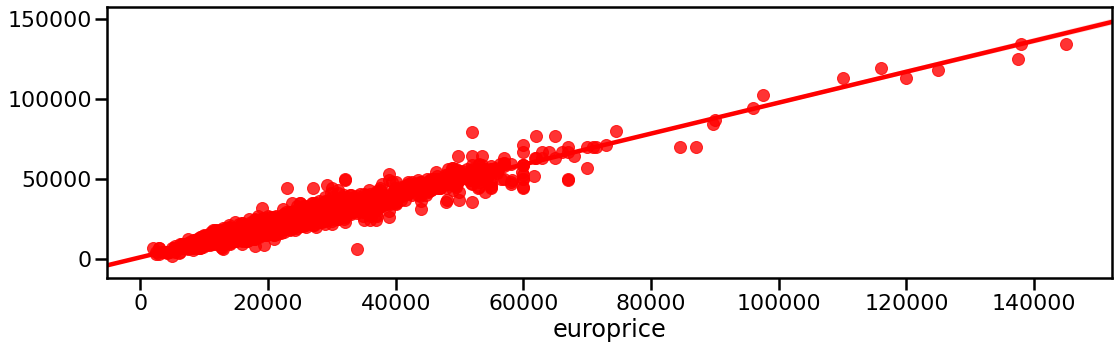

In [91]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,dtr_pred, color ='red')

In [92]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtr_pred))

Mean Absolute Error: 1976.4971735023282


In [93]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

Root Mean Squared Error: 3000.712847310926


---
---
---
## _And now,_


# _C O N C L U S I O N:_
---
---

## _I have done Analysis as well as visualization of the Dataset._

## _And I have Trained the model using:_

- ### _Linear Regression_
- ### _Random Forest Regressor_
- ### _Extra Tree Regressor_
- ### _Decision Tree Regressor_

##### And now, 

## _From the above 3 trained Models, It can be seen that <br><br>the Random Forest Regressor model performed better than the rest of the three models !_
---